In [201]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve
import matplotlib.animation as animation

In [202]:
def System(t,r0,g=9.81):
    
    x,y,vx,vy = r0
    ax = 0.
    ay = -g
    
    return np.array([vx,vy,ax,ay])

In [203]:
def trayectoria(theta,x=0.,y=0.,v0=40.):
    alpha = np.deg2rad(theta)
    r0 = np.array([x,y,v0*np.cos(alpha),v0*np.sin(alpha)])

    t = np.linspace(0,6,100)

    solution = solve_ivp(System,(t[0],t[-1]),r0,t_eval=t,method='RK45')

    return solution

In [204]:
misil = trayectoria(145,150,0,40)
t = misil.t
x = misil.y[0]
y = misil.y[1]

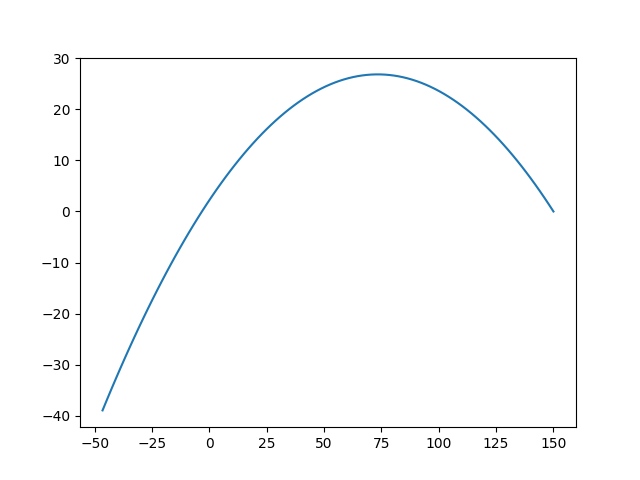

In [205]:
plt.plot(x,y)

In [206]:
def buscar_theta(x,y,x0=0,y0=0,v0=40):
    thetaUP = 90
    thetaDOWN = 0
    for i in range(1000):
        antiUP = trayectoria(thetaUP,x0,y0,v0)
        antiUPx = antiUP.y[0]
        antiUPy = antiUP.y[1]
        antiDOWN = trayectoria(thetaDOWN,x0,y0,v0)
        antiDOWNx = antiDOWN.y[0]
        antiDOWNy = antiDOWN.y[1]
        diffUParr = np.square(antiUPy-y)+np.square(antiUPx-x)
        diffUP = np.min(diffUParr)
        diffDOWNarr = np.square(antiDOWNy-y)+np.square(antiDOWNx-x)
        diffDOWN = np.min(diffDOWNarr)
        if diffUP < 1e-3:
            return thetaUP
        if diffDOWN < 1e-3:
            return thetaDOWN
        dtheta = np.abs(thetaUP-thetaDOWN)
        if diffUP < diffDOWN:
            yUP = np.where(diffUP == diffUParr)[0][0]
            if y[yUP] < antiUP.y[1][yUP]:
                thetaDOWN += dtheta/2
            else:
                thetaDOWN = thetaUP
                thetaUP += dtheta
        else:
            yDOWN = np.where(diffDOWN == diffDOWNarr)[0][0]
            if y[yDOWN] < antiDOWN.y[1][yDOWN]:
                thetaUP = thetaDOWN
                thetaDOWN -= dtheta
            else:
                thetaUP -= dtheta/2
    return thetaUP

In [207]:
angulo = buscar_theta(x,y,0,0,40)
angulo

35.15624999999999

In [208]:
yAnti = trayectoria(angulo).y[1]
xAnti = trayectoria(angulo).y[0]

In [209]:
plt.plot(xAnti,yAnti,label = "Trayectoria del anti misil")
plt.plot(x,y, label = "Trayectoria del misil")
plt.legend()

In [210]:
def update(frame):
    line1.set_data(x[:frame+1], y[:frame+1])
    line2.set_data(xAnti[:frame+1], yAnti[:frame+1])
    return line1, line2

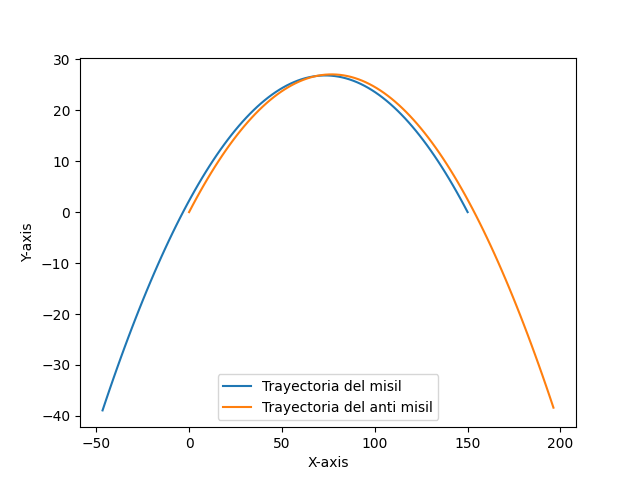

In [211]:
fig, ax = plt.subplots()
line1, = ax.plot(x, y, label='Trayectoria del misil')
line2, = ax.plot(xAnti, yAnti, label='Trayectoria del anti misil')

ax.legend()

ani = animation.FuncAnimation(fig, update, frames=len(x), interval=400, blit=True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [212]:
misil1 = trayectoria(160,150,0,60)
t1 = misil.t
x1 = misil.y[0]
y1 = misil.y[1]
angulo1 = buscar_theta(x,y,0,0,60)
yAnti1 = trayectoria(angulo).y[1]
xAnti1 = trayectoria(angulo).y[0]